In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [4]:
df = pd.read_csv("heights_outlier.csv")
df.sample(5)

,gender,height
7295,Female,62.199950
1520,Male,67.559301
5872,Female,61.646641
9937,Female,63.135052
9136,Female,65.388305


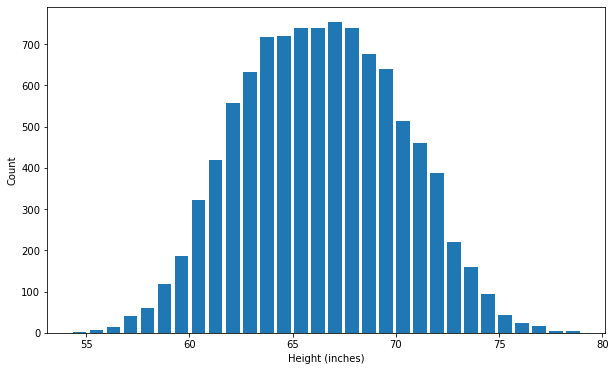

In [11]:
# bins means bar size

plt.hist(df.height, bins=30, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

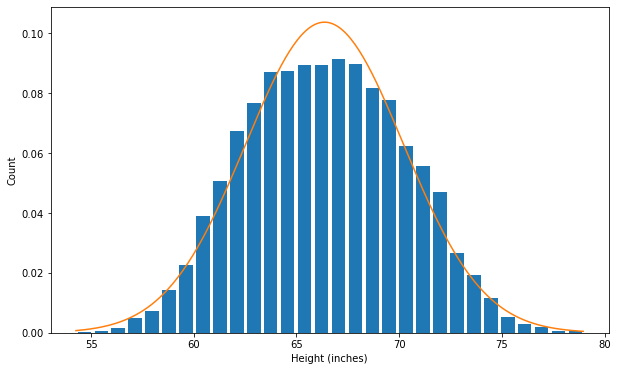

In [34]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=30, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [14]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [15]:
df.height.mean()

66.3675597548656

In [16]:
df.height.std()

3.847528120795573

# Outlier detection and removal using 3 standard deviation

In [17]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725232

In [18]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392478876

In [19]:
# THIS IS OUTLIER 

df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


# CLEAR DATA 


In [20]:

df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [21]:
df_no_outlier_std_dev.shape

(9993, 2)

In [22]:
df.shape

(10000, 2)

In [25]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

# Outlier detection and removal using => Z Score

### Z score indicates how many standard deviation away a data point is.
#### For example in our case mean is 66.37 and standard deviation is 3.84.

### If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [26]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [27]:
(73.84-66.37)/3.84

1.9453124999999998

In [28]:
# outlier

df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [29]:
# outlier

df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [30]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


# Clean data

In [31]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [32]:
df_no_outliers.shape

(9993, 3)

In [33]:
df.shape

(10000, 3)